<a href="https://colab.research.google.com/github/baranshad/chase-the-dream/blob/master/R_phewas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install packages**

In [0]:
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library(devtools)
install_github("PheWAS/PheWAS")

Loading required package: usethis


ggplot2     (3.2.0 -> 3.2.1     ) [CRAN]
meta        (NA    -> 4.9-6     ) [CRAN]
ggrepel     (NA    -> 0.8.1     ) [CRAN]
DT          (NA    -> 0.8       ) [CRAN]
logistf     (NA    -> 1.23      ) [CRAN]
lmtest      (NA    -> 0.9-37    ) [CRAN]
metafor     (NA    -> 2.1-0     ) [CRAN]
lme4        (NA    -> 1.1-21    ) [CRAN]
htmlwidgets (NA    -> 1.3       ) [CRAN]
crosstalk   (NA    -> 1.0.0     ) [CRAN]
promises    (NA    -> 1.0.1     ) [CRAN]
mice        (NA    -> 3.6.0     ) [CRAN]
zoo         (NA    -> 1.8-6     ) [CRAN]
minqa       (NA    -> 1.2.4     ) [CRAN]
nloptr      (NA    -> 1.2.1     ) [CRAN]
RcppEigen   (NA    -> 0.3.3.5.0 ) [CRAN]
shiny       (NA    -> 1.3.2     ) [CRAN]
httpuv      (NA    -> 1.5.1     ) [CRAN]
xtable      (NA    -> 1.8-4     ) [CRAN]
sourcetools (NA    -> 0.1.7     ) [CRAN]
later       (NA    -> 0.8.0     ) [CRAN]
mitml       (NA    -> 0.3-7     ) [CRAN]
pan         (NA    -> 1.6       ) [CRAN]
jomo        (NA    -> 2.6-9     ) [CRAN]
ordinal     (NA 

Installing 27 packages: ggplot2, meta, ggrepel, DT, logistf, lmtest, metafor, lme4, htmlwidgets, crosstalk, promises, mice, zoo, minqa, nloptr, RcppEigen, shiny, httpuv, xtable, sourcetools, later, mitml, pan, jomo, ordinal, ucminf, numDeriv
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/RtmphNC7w1/remotes881879c1b7/PheWAS-PheWAS-b9fb26b/DESCRIPTION’
─  preparing ‘PheWAS’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
     NB: this package now depends on R (>= 3.5.0)
─  building 'PheWAS_0.99.5.tar.gz'
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library(ggplot2)
library(devtools)
library(PheWAS)
library(readr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: parallel
Welcome to the new version of PheWAS. This version has many updates; please see https://github.com/PheWAS/PheWAS/tree/legacy for the legacy release if needed. Check ?PheWAS for more documentation


With visible output:

# ***Import the CSV files***

![alt text](https://www.researchgate.net/profile/John_Meara/publication/283457080/figure/fig1/AS:353686648836096@1461336876078/Whereas-CL-P-diagnostic-codes-in-ICD-9-CM-consist-of-five-numbers-ICD-10-CM-codes-are.png)

# **ICD10 code description:  CM = Clinical Modification**

![alt text](https://static.aapc.com/aapc/images/Code-format-example.jpg)

# **Exclusion criterion:** 

Explanation example: ICD-10 diagnostic codes were mapped to “PheWAS codes” using methodology from Neuraz et al. This involved converting individual ICD-10 codes into a higher order of grouped codes for a single disease, e.g. grouping codes A00.0, A00.9, A00.1, A00 for cholera into a three-character code A00 (“PheWAS code”) and using broader A00-A09 range (intestinal infectious diseases) as an exclusion criterion for the control group (S1 Table). If a significant association was observed, we repeated the analysis using the individual ICD-10 code to define the case group while keeping the control group criteria unchanged, e.g A00.0 as the case group and A00-A09 as exclusion criteria. -------- from paper:  An exploratory phenome wide association study linking asthma and liver disease genetic variants to electronic health records from the Estonian Biobank

# *vocabulary_id: *


For example:   "ICD9CM","ICD9CM","ICD10CM" 

In [0]:
icd10cm_codes=read_csv("https://raw.githubusercontent.com/baranshad/chase-the-dream/master/id_icd10_count.csv", col_types="ifci") 
### ifci ?  integer, factor, character, integer 
genotypes= read.csv('https://raw.githubusercontent.com/baranshad/chase-the-dream/master/genotypes.csv',sep=',',colClasses=c("integer","integer"))
phenotypes=createPhenotypes(icd10cm_codes)
#### createPhenotypes This function takes a data frame with four columns: id, vocabulary_id, code, and index. 
#### It returns a wide table with phecodes as TRUE/FALSE/NA. It can optionally use the PheWAS exclusion criteria.
#### vocabulary_id=c("ICD9CM","ICD9CM","ICD10CM") 
results=phewas(phenotypes,genotypes,cores=1,significance.threshold=c("bonferroni"))
###  The number of cores to use in the parallel socket cluster implementation.
###  If cores=1, lapply will be used instead.
head(results)

Warning message in createPhenotypes(icd10cm_codes):
“It is recommended to provide id.sex information to help address spurious sex-specific associations.”Mapping codes to phecodes...
Aggregating codes...
Mapping exclusions...
Coalescing exclusions and min.code.count as applicable...
Reshaping data...
Merging data using these shared columns:  id
Finding associations...
Compiling results...
Cleaning up...
Finding significance thresholds...


phenotype,snp,adjustment,beta,SE,OR,p,type,n_total,n_cases,n_controls,HWE_p,allele_freq,n_no_snp,note,bonferroni
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<lgl>
008,rsEXAMPLE,NA,0.04050068,0.3029714,1.041332,0.8936570,logistic,4886,49,4837,1,0.4954973,0,,FALSE
008.5,rsEXAMPLE,NA,0.04049239,0.3060479,1.041323,0.8947412,logistic,4885,48,4837,1,0.4954964,0,,FALSE
008.51,rsEXAMPLE,NA,NA,NA,NA,NA,NA,4837,NA,NA,NA,NA,0,[Error: non-varying phenotype or genotype],NA
008.52,rsEXAMPLE,NA,NA,NA,NA,NA,NA,4837,NA,NA,NA,NA,0,[Error: non-varying phenotype or genotype],NA
008.6,rsEXAMPLE,NA,NA,NA,NA,NA,NA,4837,NA,NA,NA,NA,0,[Error: non-varying phenotype or genotype],NA
008.7,rsEXAMPLE,NA,NA,NA,NA,NA,NA,4837,NA,NA,NA,NA,0,[Error: non-varying phenotype or genotype],NA


# **Pheotype: **

# **T/F/NA for case/control/exclude or continuous/NA if min.code.count was NA**

In [0]:
phenotypes

id,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,⋯,985,986,987,988,989,990,994,994.1,994.2,994.21
<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,NA,NA,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
9,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


ERROR: ignored

In [0]:
install.packages('swfscMisc')
library(swfscMisc)
sum(na.count(phenotypes)) ## all 783966/(5000*1814) = 8.64% missing 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


[1] 783966

# ***List the significant results***

# **beta:  The beta coefficient for the predictor: **

![alt text](https://i.ytimg.com/vi/q34S_B1S6AY/maxresdefault.jpg)

![alt text](https://cdn.wallstreetmojo.com/wp-content/uploads/2014/10/Beta-Values.png)

# **SE ** : The standard error for the beta coefficient
# **OR: odds ratio **: For logistic regression, the odds ratio for the predictor
# **p: p-value**
# **HWE_p: The Hardy-Weinberg equilibrium p-value for the predictor, assuming 0,1,2 allele coding **

In [0]:
results_d=addPhecodeInfo(results)
#List the significant results
dim(results_d[!is.na(results_d$beta),])   ## 405 18 
print(results_d[!is.na(results_d$beta),])

[1] 405  18

     phenotype       snp adjustment         beta         SE        OR
1          008 rsEXAMPLE       <NA>  0.040500680 0.30297135 1.0413320
2        008.5 rsEXAMPLE       <NA>  0.040492387 0.30604787 1.0413234
8          031 rsEXAMPLE       <NA>  0.757777510 0.40915292 2.1335292
10         038 rsEXAMPLE       <NA>  0.520358028 0.38735008 1.6826300
14         041 rsEXAMPLE       <NA>  0.113623054 0.22443857 1.1203297
15       041.1 rsEXAMPLE       <NA>  0.403533883 0.29149640 1.4971060
18       041.2 rsEXAMPLE       <NA>  0.165800850 0.31973546 1.1803380
26         070 rsEXAMPLE       <NA>  0.369281216 0.39652101 1.4466944
32         071 rsEXAMPLE       <NA>  0.600639110 0.42228274 1.8232837
35         079 rsEXAMPLE       <NA>  0.322839517 0.36671695 1.3810437
40         081 rsEXAMPLE       <NA> -0.283871366 0.28082681 0.7528635
41       081.1 rsEXAMPLE       <NA> -0.289480045 0.28323840 0.7486527
44         090 rsEXAMPLE       <NA>  0.288474767 0.29126486 1.3343907
46       090.3 rsEXA

In [0]:
table(results_d$HWE_p) ## 443 HWE_p = 1 


  1 
443 

In [0]:
sig_results=results_d[results_d$bonferroni&!is.na(results_d$p),] 
print(sig_results)
results_d[which(results_d$bonferroni=="TRUE"),] ## only twp rows have bonferroni == True 

    phenotype       snp adjustment      beta         SE       OR            p
743       411 rsEXAMPLE       <NA> 0.4904420 0.06733767 1.633038 3.256971e-13
747     411.4 rsEXAMPLE       <NA> 0.4956921 0.06753988 1.641634 2.147928e-13
        type n_total n_cases n_controls HWE_p allele_freq n_no_snp note
743 logistic    4655    1575       3080     1   0.4946294        0     
747 logistic    4644    1564       3080     1   0.4947244        0     
    bonferroni              description              group
743       TRUE   Ischemic Heart Disease circulatory system
747       TRUE Coronary atherosclerosis circulatory system


# ***Phewas Manhattan Plot***

# **phewasManhattan: **

# ***OR.direction :***  Adjust point shape based on odds ratio direction

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.


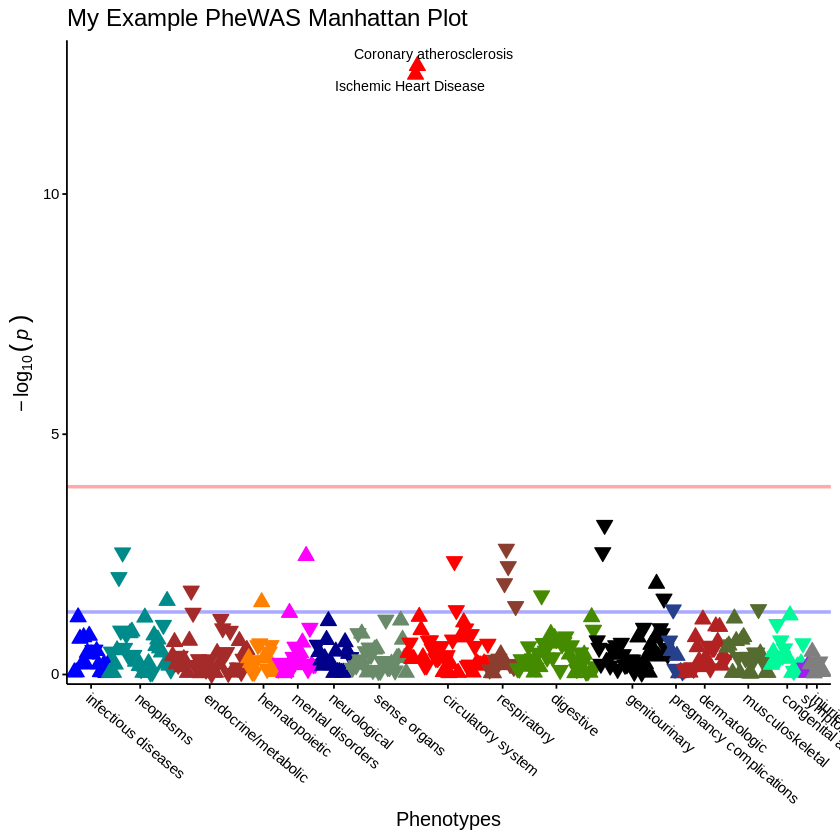

In [36]:
### 
phewas_plot=phewasManhattan(results, OR.direction = T, title="My Example PheWAS Manhattan Plot", annotate.size=3, annotate.snp= F)
phewas_plot